## N-body gravitasjonssimulasjon
#### Innholdsliste
- Liten beskrivelse av problemet jeg prøvde å løse.
- Matematikken bak det
    - Algoritmen
- Bilder med litt forklaringer eller noe sånt
- Hele koden ( copy-pastet fra de andre .py filene i repositoriet )
    - Vektorklassen min
    - Noen datahåndteringsklasser
    - Hovedkoden
- Mer bilder (der ting gikk galt)

#### Litt info
Det ble litt tull med imports i python cellene under, så jeg måtte splitte opp den originale koden
inn i flere mindre filer. Den originale koden ligger under "simulation.py" hvis du vil ta en titt der.
 (resultatet av koden er helt lik som det vi får her, bortsett fra at alt ligger på ett sted)

##### Hva har jeg endt opp med?
Først ville jeg ha en real-time n-body physics simulator ( i c# / c++),
noe som kanskje var en litt stor ambisjon. Til slutt endte jeg opp med å gjøre det
i python, men i stedet for real-time simulasjon ble det plotting.
Altså, simulerer vi posisjonene til et sett med objekter over tid gjennom integrasjon.
Den kan ikke direkte regne ut hvor noe ender opp etter x-mye tid, men den tar startparametere
og bruker de videre for å simulere objektets bevegelse videre.

##### Litt om å tolke resultater
Det er kanskje litt rotete at jeg glemte enhetene i sånn 90% av bildene.
Det vil ta alt for lang tid å prøve å reprodusere bildene med rikig info,
så under er et bilde med hvordan jeg har satt opp aksene, i håp om at det blir lettere å
se hva jeg har gjort og hva jeg har endt opp med.
![forklaring](img/grafikk_forklaring.png)
Vi ser altså at aksene viser meter og så ser vi hvilke akse som er hvilke.
Det er lagt opp som dette pga. hvordan matplotlib setter default-argumentene til en graf.
Uansett, synes jeg det funket helt ok for å vise banene mine, så jeg lot det være.

Det er noen parametere i koden som endrer hvilke akser som er hvilke, men jeg synes
det er vanskelig å lese av når man endrer perspektivet hele tiden.

obs: <br>
Noe annet som er verdt å merke, er at akseenhetene er på formen "1e+11".
Dvs. at hver enhet på figuren altså er 1e+11 meter. Prøver vi å lese av $x=3.2$,
er avstanden fra origo lik $3.2\times 1e+11$ meter.
Origo er posisjonen til sola, og sola er sånn isj på midten av alle bildene.
(altså på midten av hver akse)

### Matematikken/fysikken bak det
Ok så først og fremst skal jeg si litt om hvordan fysikken bak dette funker:
Gitt en planet, dens masse, startfart og -posisjon,
skal programmet forutsi hvor denne planeten kommer til å ende opp etter en viss
mengde loops og/eller etter en viss tid. Dette gjør vi gjennom
Newtons lov om universell tyngdekraft (det navnet er kanskje litt direkteoversatt fra engelsk (: )

Før jeg viser utregningene vi gjør i programmet skal jeg bare vise litt om hvordan fysikken
går:

- Posisjon er et sted (en posisjonsvektor) i rommet.
- Fart er endring av posisjon per sekund.
- Akselerasjon er endring av farten, også per sekund.

Hvis vi skal finne den nye posisjonen, må vi ta den gamle og plusse på farten den hadde ganget
 med tiden som har passert. Dette kan være sekunder, timer, dager, måneder, etc.
 Jo kortere tid, jo mer nøyaktig, men avstanden vi beveger oss er kortere.
 I simulasjonen kalles denne tiden timeStep.
For å få farten bruker jeg $v = v_0 + a\times t$, der t igjen er tiden som har passert.
Akselerasjonen finner vi gjennom formelen $F=m\times a \Rightarrow a = \frac{F}{m}$.
For å så få kraften F, bruker vi $F=\frac{G\times m_1 \times m_2}{r^2}$

Uansett, så må dette regnes ut for alle andre planeter i systemet vårt,
der vi legger sammen akselerasjonene.
Siden jeg bruker vektorer blir dette fryktelig enkelt, siden formelene blir nesten det samme.
Her er det vektorformen:
- $\vec{p_{ny}} = \vec{p} + \vec{v}\times tid$.
- $\vec{v} += \vec{a}\times tid$
- $\vec{a} += \frac{\vec{F}}{m_1}$
- $\vec{F} = \frac{\vec{d} \times G \times m_1 \times m_2}{r^2}$
- $\vec{d} = \frac{\vec{p_2} - \vec{p_1}}{|\vec{p_2} - \vec{p_1}|}$

Over er p posisjon, v fart, a akselerasjon, f kraft og d er den normaliserte vektoren mellom
posisjonen til planet 1 og planet 2 (retningsvektor). r er avstanden mellom de to planetene
(lengden til vektoren mellom de to planetene)

#### Litt om algoritmen
Algoritmen i seg selv kalles Euler-Cromer-metoden og sies å være den enkleste integrerende
banesimulasjons-algoritmen. Min implementasjon bruker sånn isj 1 minutt på å
fullføre en simulasjon, så den er ganske kjapp.

Denne metoden holder banene noe presise over lengre tid men
anses som unøyaktig siden den ikke tar fullstendig hensyn til
energien planetene har (kinetisk og potensiell). I.e. kinetisk energi kommer an på farten
til planeten og potensiell kommer an på avstanden planeten har fra sentrum av banen.
Når noe går i bane skal energien alltid være konstant. <br>
(Høy potensiell energi $\Rightarrow$ lav kinetisk energi $\Rightarrow$ lav fart)
For denne simulasjonen føler jeg dette er irrelevant siden jeg bare ville at programmet
skulle funke (det tok ganske mange forsøk).

I tillegg, kommer feil 100% naturlig med Eulers metode. Jo lenger man prøver å spå en
funksjon, jo større feil får man. På begynnelsen, er Eulermetoden ganske nøyaktig, men så
ser man at den begynner å gjøre feil etter veldig mange iterasjoner, fordi størrelsen
på feilene øker med hver iterasjon, siden vi bruker forrige iterasjon som nytt startpunkt.

Andre metoder som kan funke litt bedre er Runge-Kutta-metoden og leapfrog-integrasjon.
Jeg har ikke tittet fryktelig mye på det, men det virker som at Runge-Kutta
er en av de mest nøyaktige integrasjonsmetodene folk har funnet på. En nedside er at den
er mye tyngre å regne ut og funker altså litt dårlig i python.
Jeg leste også at man kan få bedre resultater av å implementere
Einsteins relativitetsteori, men det er litt out of my league.

### Bilder og stuff
Aller først ville jeg lage hele greia i C#.
Dette gikk dårlig siden jeg brukte Unity, som bare bruker 32-bit floats.
Uansett hvordan jeg prøvde å skalere ned verdiene mine endte jeg opp med unøyaktige baner og
evt. float precision errors. Her er et par bilder av hva jeg fikk til i C#.

![weird orbit](img/enPeriode.png)
![atommodell?](img/kortSimulering.png)
![weird orbit](img/langSimulering.png)

Over ser vi altså hvordan banen til en liten planet(med en egen måne) utviklet seg over tid.
Grunnen til at den lagde dette mønsteret tror jeg kommer av float precision errors, siden
programmet jeg lagde i python kjører basically samme kode og får et annet resultat.
(mønsteret er fortsatt sykt kult da :D)

#### Bilder fra Python
Uansett, innså jeg at jeg egentlig måtte begynne å bruke rendering-triks
for å få ting til å *se* ekte ut,
i stedet for å faktisk lage en kul og (nesten) realistisk simulasjon.
Så her er noen bilder etter at jeg gjorde akkurat det samme i python:

![elliptical orbit](img/mars-elliptical-orbit.png)
På bildet over ser vi den første elliptiske banen dette programmet klarte å kalkulere.
Det var et stort øyeblikk :)

Under, er hele solsystemet simulert. I midten ser vi en tett konsentrasjon av farger,
som egentlig kommer av unøyaktigheter med Eulers metode; vi altså simulert sånn 165
år(Neptuns baneperiode) som gjør at de små, indre planetene fullfører mange baner.
I tillegg, blir de små planetene påvirket av de store planetene i systemet,
som hele tiden degraderer banene deres. (også på grunn av unøyaktigheter)
En annen grunn, er at det er *sinnsykt* mange punkter i midten, fordelt
over et veldig trangt område. Dermed får vi disse fine, flashy fargene.

![fult solsystem](img/fullSolarSystem.png)

#### Under kommer all koden.
Håper det går greit at mange av kommentarene mine er på engelsk.

In [ ]:
# dette er copy pastet fra vector3class.py som brukes for vektormatte:
import math


# This bad boy is super useful. Has methods for vector-calculations.
class Vector3:
    def __init__(self, x, y, z=0):
        self.x = x
        self.y = y
        self.z = z

    def __add__(self, other):
        return Vector3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __sub__(self, other):
        return Vector3(self.x - other.x, self.y - other.y, self.z - other.z)

    def __truediv__(self, scalar):
        if scalar == 0: print("Vector division by zero.")
        return Vector3(self.x/scalar, self.y/scalar, self.z/scalar)

    def __mul__(self, scalar):
        return Vector3(self.x*scalar, self.y*scalar, self.z*scalar)

    def Magnitude(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)

    def Normalize(self):
        return self / self.Magnitude()

    def __str__(self):
        return str(self.x) + ", " + str(self.y) + ", " + str(self.z)

#### Generelle klasser jeg bruker til å håndtere data:

In [2]:
# Copy pastet fra genericClasses.py:

from vector3class import *

# ___CLASSES___ #

# Basically planets. Can possibly be other stuff if we want to. (e.g. asteroids)
# Note that we don't track size and such (for now)
class Body:
    def __init__(self, position, velocity=Vector3(0,0), mass=0.0, name="unknown"):
        self.position = position
        self.velocity = velocity
        self.mass = mass
        self.name = name


# Holds the actual data to be plotted, with a label attached so we know what it is.
# I made this because I think dictionaries and lists can become quite messy sometimes.
# Also, classes are cool :)
class BodyData:
    def __init__(self, label, positions = []):
        self.positions = positions  # Holds vector3's
        self.label = label

    def __str__(self):
        return "Name: " + self.label + ", " + str(self.positions)

#### Selve simulasjonskoden:

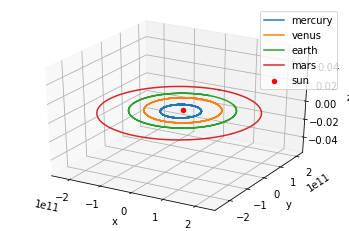

In [1]:
# Den faktiske simulasjonskoden:

from vector3class import *
from genericClasses import *

# "___SOMETHING SOMETHING___" is just header comments to mark sections.

# ___THE PHYSICS___ #

# F = G * m1 * m1 / r^2
# a = F / m1
def UpdateAcceleration(body, objectList, timeStep):
    G = 6.674E-11

    acceleration = Vector3(0,0,0)
    for otherBody in objectList:
        if otherBody != body:
            distance = otherBody.position - body.position
            unitVector = distance.Normalize()
            r = distance.Magnitude()
            acceleration += unitVector * G * otherBody.mass / r ** 2
    return acceleration


# v = a * t
def UpdatePosition(body, objectList, timeStep=1):
    # Multiply by time squared to get final and longest distance possibly traveled in x amount of time.
    body.velocity += UpdateAcceleration(body, objectList, timeStep) * timeStep
    body.position += body.velocity * timeStep


# This is the main loop that stores our points.
def Simulate(objectList, iterations=100, timeStep=1):
    orbits = []
    for body in objectList:
        orbits.append(BodyData(body.name, [body.position]))

    for iteration in range(iterations):
        for index, body in enumerate(objectList):
            UpdatePosition(body, objectList, timeStep)
            orbits[index].positions.append(body.position)

    return orbits

# ___THE PLOTTING___ #
# We make the graphs here :)
from matplotlib import pyplot as plt


# Plots the actual data.
# *Slaps roof of function* "This bad boy can fit so many cool graphs in it"
# also it can do rotations and stuff.
def PlotTheData(systemData, rotate=True, zdir="z"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Controls maximum number shown on each axis.
    axisRange = 0

    # Each bodyData contains a name and a list of vectors3's.
    for bodyData in systemData:
        positions = bodyData.positions
        xValues = []
        yValues = []
        zValues = []
        for vector in positions:
            xValues.append(vector.x)
            yValues.append(vector.y)
            zValues.append(vector.z)

        # Used to stretch the axes so they are the same length.
        largestPositionValue = max([max(xValues), abs(min(xValues)),
                                    max(yValues), abs(min(yValues)),
                                    max(zValues), abs(min(zValues))])
        if axisRange < largestPositionValue: axisRange = largestPositionValue

        # The centre of the system is usually the first object in the list and may not move much.
        # Therefore we make it a dot and only plot it once.
        if bodyData is systemData[0]:
            ax.scatter(xValues[0], yValues[0], zValues[0], label=bodyData.label, zdir=zdir, color="r")
        else:
            ax.plot(xValues, yValues, zValues, label=bodyData.label, zdir=zdir)

    # These lines just name the axes.
    # Doesn't account for simulations where zDir is changed.
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.legend()

    # Here I set the axis ranges. ***unused because it was confusing to look at***
    #ax.set_xlim(-axisRange,axisRange)
    #ax.set_ylim(-axisRange,axisRange)
    #ax.set_zlim(-axisRange,axisRange)

    # This part rotates the thing around for a while. ***doesnt work in the notebook***
    if rotate:
        rotatePlot(ax)

    plt.show()  # Shows interactive figure until we exit.

# Rotates the plot (doesn't work in the notebook version)
def rotatePlot(ax):
    framePause = 1 / 60**2
    for loopAmount in range(2):
        # Rotates it to view from top.
        for angle in range(10, 90):
            ax.view_init(angle, 45)
            plt.draw()
            plt.pause(framePause)
        # Rotates it down.
        for angle in range(90, -30, -1):
            ax.view_init(angle, 45)
            plt.draw()
            plt.pause(framePause)
        # Rotates it back up again so we can loop.
        for angle in range(-30, 10):
            ax.view_init(angle, 45)
            plt.draw()
            plt.pause(framePause)


# ___THE SIMULATION PART___ #
# __PRESET SYSTEM CONFIGURATIONS__ #

# all data taken from: https://nssdc.gsfc.nasa.gov/planetary/factsheet/
# Solar System:
sun = Body(position=Vector3(0,0),
           velocity=Vector3(0,0),
           mass=1.989E30,
           name="sun")
mercury = Body(position=Vector3(0,46.00e+9),
            velocity=Vector3(-58980,0),
            mass=3.3011E+23,
            name="mercury")
venus = Body(position=Vector3(0,107.48e+9),
            velocity=Vector3(-35260,0),
            mass=4.87e+24,
            name="venus")
earth = Body(position=Vector3(0,147098074e+3),
             velocity=Vector3(-30290,0),
             mass=5.97e24,
             name="earth")
mars = Body(position=Vector3(0,206.7e+9),
            velocity=Vector3(-26500,0),
            mass=6.39e+23,
            name="mars")
jupiter = Body(position=Vector3(0,740.52e+9),
               velocity=Vector3(-13720, 0),
               mass=1898.19e+24,
               name="jupiter")
saturn = Body(position=Vector3(0,1352e+9),
              velocity=Vector3(-10180, 0),
              mass=568.34e+24,
              name="saturn")
uranus = Body(position=Vector3(0, 2741.30e+9),
              velocity=Vector3(-7.11e+3, 0),
              mass=86.813e+24,
              name="uranus")
neptune = Body(position=Vector3(0,4444.45e+9),
               velocity=Vector3(-5.50e+3, 0),
               mass=102.413e+24,
               name="neptune")

solarSystem = [sun, mercury, venus, earth, mars]

# __Safe-to-touch data and stuff__ #
# More iterations means more time to compute.
# Larger timeStep means less time to compute but more inaccuracy.
# timeStep is basically just changing the time unit in our physical formulas from
# seconds to something else (e.g. like hours or days).

# E.g. if we have 100 years between each "jump" in position, it will be
# super-duper-mega inaccurate.

# Here are some time units to make it a little easier to juggle between
# iterations and timeSteps.
hour = 60*60
day = 24*hour

# Below is the "standard" parameters I have found out to work pretty nice.
# We have a timestep of one hour and by changing "669", we can change the amount
# of days we simulate. I.e. one year is 365 days, so we can simulate only one year
# if we want.
bodiesInSystem = solarSystem
iterations = 687*24
timeStep = hour
dataToPlot = Simulate(bodiesInSystem, iterations, timeStep)
PlotTheData(dataToPlot, False, "z")


Over er resultatet av koden som står i denne notebooken.
#### Feil og uønskede resultater / bloopers i guess?
Under er et par bilder av at simulasjonen IKKE funket og gjorde rare ting.
Først og fremst ser vi at jorda flere ganger blir kastet ut av systemet som simuleres.
Dette skjedde etter at jeg la til én ekstra planet i tillegg til Mars og Jorda.
Noen av dem skyldes feil startparametere mens de andre var forårsaket av at jeg glemte *én*
faktor på én linje med kode... >:(
![jorda yeetes ut av systemet](img/fails/earth_also_gets_yoten.png)
![jorda yeetes igjen](img/fails/earth_gets_yoten_into_mars_and_beyond.png)
![jorda yeetes (den originale)](img/fails/earth_gets_yoten.png)